<a href="https://colab.research.google.com/github/HowardHNguyen/Marketing_Data_Science/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
from google.colab import files
files.upload()

Saving online_retail_uci.xlsx to online_retail_uci.xlsx


In [ ]:
!ls

drive  sample_data


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/online_retail_uci.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [ ]:
# Data cleanup
# negative quantity
df.loc[df['Quantity'] <= 0].shape

(10624, 8)

In [ ]:
df.shape

(541909, 8)

In [ ]:
df = df.loc[df['Quantity'] > 0]
df.shape

(531285, 8)

In [ ]:
df.info

<bound method DataFrame.info of        InvoiceNo StockCode  ... CustomerID         Country
0         536365    85123A  ...    17850.0  United Kingdom
1         536365     71053  ...    17850.0  United Kingdom
2         536365    84406B  ...    17850.0  United Kingdom
3         536365    84029G  ...    17850.0  United Kingdom
4         536365    84029E  ...    17850.0  United Kingdom
...          ...       ...  ...        ...             ...
541904    581587     22613  ...    12680.0          France
541905    581587     22899  ...    12680.0          France
541906    581587     23254  ...    12680.0          France
541907    581587     23255  ...    12680.0          France
541908    581587     22138  ...    12680.0          France

[531285 rows x 8 columns]>

In [ ]:
# Missing Customer ID

In [ ]:
pd.isnull(df['CustomerID']).sum()

133361

In [ ]:
df.shape

(531285, 8)

In [ ]:
df = df[pd.notnull(df['CustomerID'])]

In [ ]:
df.shape

(397924, 8)

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# Excluding Incomplete Month

In [ ]:
print('Date Range: %s ~ %s' % (df['InvoiceDate'].min(), df['InvoiceDate'].max()))

Date Range: 2010-12-01 08:26:00 ~ 2011-12-09 12:50:00


In [ ]:
df.loc[df['InvoiceDate'] >= '2011-12-01'].shape

(17304, 8)

In [ ]:
df.shape

(397924, 8)

In [ ]:
df = df.loc[df['InvoiceDate'] < '2011-12-01']

In [ ]:
df.shape

(380620, 8)

In [ ]:
# Total Sales

In [ ]:
# append a new column 'Sales' to the df
df['Sales'] = df['Quantity'] * df['UnitPrice']

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
# Per Customer Data 

In [ ]:
customer_df = df.groupby('CustomerID').agg({
    'Sales': sum,
    'InvoiceNo': lambda x: x.nunique()
})

customer_df.columns = ['TotalSales', 'OrderCount']
customer_df['AvgOrderValue'] = customer_df['TotalSales']/customer_df['OrderCount']

In [ ]:
customer_df.head(15)

,TotalSales,OrderCount,AvgOrderValue
CustomerID,,,
12346.0,77183.60,1,77183.600000
12347.0,4085.18,6,680.863333
12348.0,1797.24,4,449.310000
12349.0,1757.55,1,1757.550000
12350.0,334.40,1,334.400000
12352.0,2506.04,8,313.255000
12353.0,89.00,1,89.000000
12354.0,1079.40,1,1079.400000
12355.0,459.40,1,459.400000


In [ ]:
customer_df.describe()

,TotalSales,OrderCount,AvgOrderValue
count,4298.000000,4298.000000,4298.000000
mean,1952.818779,4.131689,400.255621
std,8354.913254,7.420253,1271.187289
min,0.000000,1.000000,0.000000
25%,304.305000,1.000000,178.602500
50%,657.265000,2.000000,295.033958
75%,1599.515000,4.000000,431.594250
max,268478.000000,201.000000,77183.600000


In [ ]:
rank_df = customer_df.rank(method='first')

In [ ]:
rank_df.head(10)

,TotalSales,OrderCount,AvgOrderValue
CustomerID,,,
12346.0,4290.0,1.0,4298.0
12347.0,3958.0,3470.0,3888.0
12348.0,3350.0,2861.0,3303.0
12349.0,3321.0,2.0,4238.0
12350.0,1241.0,3.0,2561.0
12352.0,3630.0,3774.0,2360.0
12353.0,119.0,4.0,201.0
12354.0,2781.0,5.0,4151.0
12355.0,1670.0,6.0,3354.0


In [ ]:
rank_df.describe()

,TotalSales,OrderCount,AvgOrderValue
count,4298.000000,4298.000000,4298.000000
mean,2149.500000,2149.500000,2149.500000
std,1240.870058,1240.870058,1240.870058
min,1.000000,1.000000,1.000000
25%,1075.250000,1075.250000,1075.250000
50%,2149.500000,2149.500000,2149.500000
75%,3223.750000,3223.750000,3223.750000
max,4298.000000,4298.000000,4298.000000


In [ ]:
normalized_df = (rank_df - rank_df.mean()) / rank_df.std()

In [ ]:
normalized_df.head(10)

,TotalSales,OrderCount,AvgOrderValue
CustomerID,,,
12346.0,1.724999,-1.731446,1.731446
12347.0,1.457445,1.064173,1.401033
12348.0,0.967466,0.573388,0.929590
12349.0,0.944096,-1.730641,1.683093
12350.0,-0.732148,-1.729835,0.331622
12352.0,1.193114,1.309162,0.169639
12353.0,-1.636352,-1.729029,-1.570269
12354.0,0.508917,-1.728223,1.612981
12355.0,-0.386422,-1.727417,0.970690


In [ ]:
normalized_df.describe()

,TotalSales,OrderCount,AvgOrderValue
count,4.298000e+03,4.298000e+03,4.298000e+03
mean,9.952744e-17,-1.231371e-16,5.719018e-17
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.731446e+00,-1.731446e+00,-1.731446e+00
25%,-8.657232e-01,-8.657232e-01,-8.657232e-01
50%,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.657232e-01,8.657232e-01,8.657232e-01
max,1.731446e+00,1.731446e+00,1.731446e+00


In [ ]:
# Customer Segmentation via K-Means Clustering
from sklearn.cluster import KMeans

In [ ]:
# K-Means Clustering

In [ ]:
kmeans = KMeans(n_clusters=4).fit(normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']])

In [ ]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
kmeans.labels_

array([0, 2, 2, ..., 3, 1, 2], dtype=int32)

In [ ]:
kmeans.cluster_centers_

array([[-0.14398196, -0.85414751,  0.78536641],
       [ 0.23685301,  0.73254711, -0.64099128],
       [ 1.20190181,  0.99212432,  0.88087723],
       [-1.24269494, -0.78956365, -1.06275068]])

In [ ]:
four_cluster_df = normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']].copy(deep=True)
four_cluster_df['Cluster'] = kmeans.labels_

In [ ]:
four_cluster_df.head()

,TotalSales,OrderCount,AvgOrderValue,Cluster
CustomerID,,,,
12346.0,1.724999,-1.731446,1.731446,0
12347.0,1.457445,1.064173,1.401033,2
12348.0,0.967466,0.573388,0.929590,2
12349.0,0.944096,-1.730641,1.683093,0
12350.0,-0.732148,-1.729835,0.331622,0


In [ ]:
four_cluster_df.groupby('Cluster').count()['TotalSales']

Cluster
0    1064
1     946
2    1131
3    1157
Name: TotalSales, dtype: int64

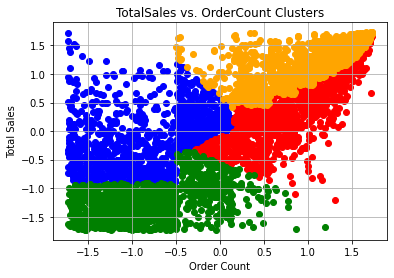

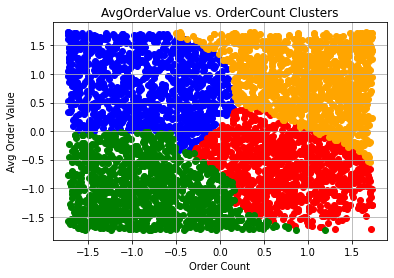

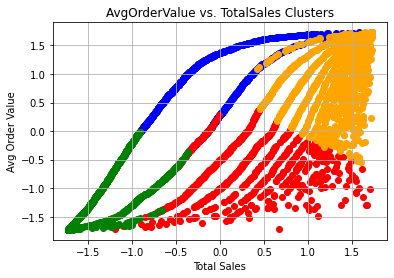

In [ ]:
plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['TotalSales'],
    c='blue'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['TotalSales'],
    c='red'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['TotalSales'],
    c='orange'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['TotalSales'],
    c='green'
)

plt.title('TotalSales vs. OrderCount Clusters')
plt.xlabel('Order Count')
plt.ylabel('Total Sales')

plt.grid()
plt.show()


plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['AvgOrderValue'],
    c='blue'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['AvgOrderValue'],
    c='red'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['AvgOrderValue'],
    c='orange'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['AvgOrderValue'],
    c='green'
)

plt.title('AvgOrderValue vs. OrderCount Clusters')
plt.xlabel('Order Count')
plt.ylabel('Avg Order Value')

plt.grid()
plt.show()


plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['TotalSales'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['AvgOrderValue'],
    c='blue'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['TotalSales'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['AvgOrderValue'],
    c='red'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['TotalSales'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['AvgOrderValue'],
    c='orange'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['TotalSales'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['AvgOrderValue'],
    c='green'
)

plt.title('AvgOrderValue vs. TotalSales Clusters')
plt.xlabel('Total Sales')
plt.ylabel('Avg Order Value')

plt.grid()
plt.show()

In [ ]:
# Selecting the best number of clusters
from sklearn.metrics import silhouette_score

In [ ]:
for n_cluster in [4,5,6,7,8]:
    kmeans = KMeans(n_clusters=n_cluster).fit(
        normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']]
    )
    silhouette_avg = silhouette_score(
        normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']], 
        kmeans.labels_
    )
    
    print('Silhouette Score for %i Clusters: %0.4f' % (n_cluster, silhouette_avg))

Silhouette Score for 4 Clusters: 0.4117
Silhouette Score for 5 Clusters: 0.3777
Silhouette Score for 6 Clusters: 0.3783
Silhouette Score for 7 Clusters: 0.3912
Silhouette Score for 8 Clusters: 0.3811


In [ ]:
# Interpreting Customer Segments

In [ ]:
kmeans = KMeans(n_clusters=4).fit(
    normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']]
)

In [ ]:
four_cluster_df = normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']].copy(deep=True)
four_cluster_df['Cluster'] = kmeans.labels_

In [ ]:
four_cluster_df.head(10)

,TotalSales,OrderCount,AvgOrderValue,Cluster
CustomerID,,,,
12346.0,1.724999,-1.731446,1.731446,0
12347.0,1.457445,1.064173,1.401033,1
12348.0,0.967466,0.573388,0.929590,1
12349.0,0.944096,-1.730641,1.683093,0
12350.0,-0.732148,-1.729835,0.331622,0
12352.0,1.193114,1.309162,0.169639,1
12353.0,-1.636352,-1.729029,-1.570269,2
12354.0,0.508917,-1.728223,1.612981,0
12355.0,-0.386422,-1.727417,0.970690,0


In [ ]:
kmeans.cluster_centers_

array([[-0.1365221 , -0.84944634,  0.79189125],
       [ 1.20510672,  1.00134484,  0.87223591],
       [-1.24197818, -0.79021108, -1.06067678],
       [ 0.23048344,  0.72745256, -0.64245894]])

In [ ]:
high_value_cluster = four_cluster_df.loc[four_cluster_df['Cluster'] == 2]
high_value_cluster.head()

,TotalSales,OrderCount,AvgOrderValue,Cluster
CustomerID,,,,
12353.0,-1.636352,-1.729029,-1.570269,2
12361.0,-1.243079,-1.724999,-0.776471,2
12375.0,-0.392870,-0.488770,-0.433970,2
12386.0,-0.524229,-0.485546,-0.667677,2
12401.0,-1.644411,-1.719358,-1.586387,2


In [ ]:
customer_df.loc[high_value_cluster.index].describe()

,TotalSales,OrderCount,AvgOrderValue
count,1157.000000,1157.000000,1157.00000
mean,192.549265,1.331893,152.20857
std,90.078614,0.576765,63.04874
min,0.000000,1.000000,0.00000
25%,123.240000,1.000000,107.95000
50%,182.770000,1.000000,151.30000
75%,248.610000,2.000000,197.65000
max,482.050000,6.000000,292.47000


In [ ]:
pd.DataFrame(
    df.loc[
        df['CustomerID'].isin(high_value_cluster.index)
    ].groupby('Description').count()[
        'StockCode'
    ].sort_values(ascending=False).head()
)

,StockCode
Description,
REX CASH+CARRY JUMBO SHOPPER,138
WHITE HANGING HEART T-LIGHT HOLDER,135
REGENCY CAKESTAND 3 TIER,80
ASSORTED COLOUR BIRD ORNAMENT,78
BAKING SET 9 PIECE RETROSPOT,72


In [ ]:
pd.DataFrame(
    df.loc[
        df['CustomerID'].isin(
            four_cluster_df.loc[four_cluster_df['Cluster'] == 3].index
        )
    ].groupby('Description').count()[
        'StockCode'
    ].sort_values(ascending=False).head()
)

,StockCode
Description,
WHITE HANGING HEART T-LIGHT HOLDER,613
REX CASH+CARRY JUMBO SHOPPER,437
REGENCY CAKESTAND 3 TIER,316
ASSORTED COLOUR BIRD ORNAMENT,309
PARTY BUNTING,308
